In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
from pandas_profiling import ProfileReport


In [3]:
data = pd.read_csv('supermarket_sales - Sheet1.csv')

In [4]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
data = data.drop(['Invoice ID'],axis=1)

In [6]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income             

There is no missing values in this dataset

In [8]:
df = data.copy()

In [9]:
data[[i for i in data.columns if data[i].dtypes == 'object']]

,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
0,A,Yangon,Member,Female,Health and beauty,1/5/2019,13:08,Ewallet
1,C,Naypyitaw,Normal,Female,Electronic accessories,3/8/2019,10:29,Cash
2,A,Yangon,Normal,Male,Home and lifestyle,3/3/2019,13:23,Credit card
3,A,Yangon,Member,Male,Health and beauty,1/27/2019,20:33,Ewallet
4,A,Yangon,Normal,Male,Sports and travel,2/8/2019,10:37,Ewallet
...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,1/29/2019,13:46,Ewallet
996,B,Mandalay,Normal,Female,Home and lifestyle,3/2/2019,17:16,Ewallet
997,A,Yangon,Member,Male,Food and beverages,2/9/2019,13:22,Cash
998,A,Yangon,Normal,Male,Home and lifestyle,2/22/2019,15:33,Cash


In [10]:
data[[i for i in data.columns if data[i].dtypes != 'object']]

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35,4.761905,2.0175,6.2
996,97.38,10,48.6900,1022.4900,973.80,4.761905,48.6900,4.4
997,31.84,1,1.5920,33.4320,31.84,4.761905,1.5920,7.7
998,65.82,1,3.2910,69.1110,65.82,4.761905,3.2910,4.1


In [11]:
data.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


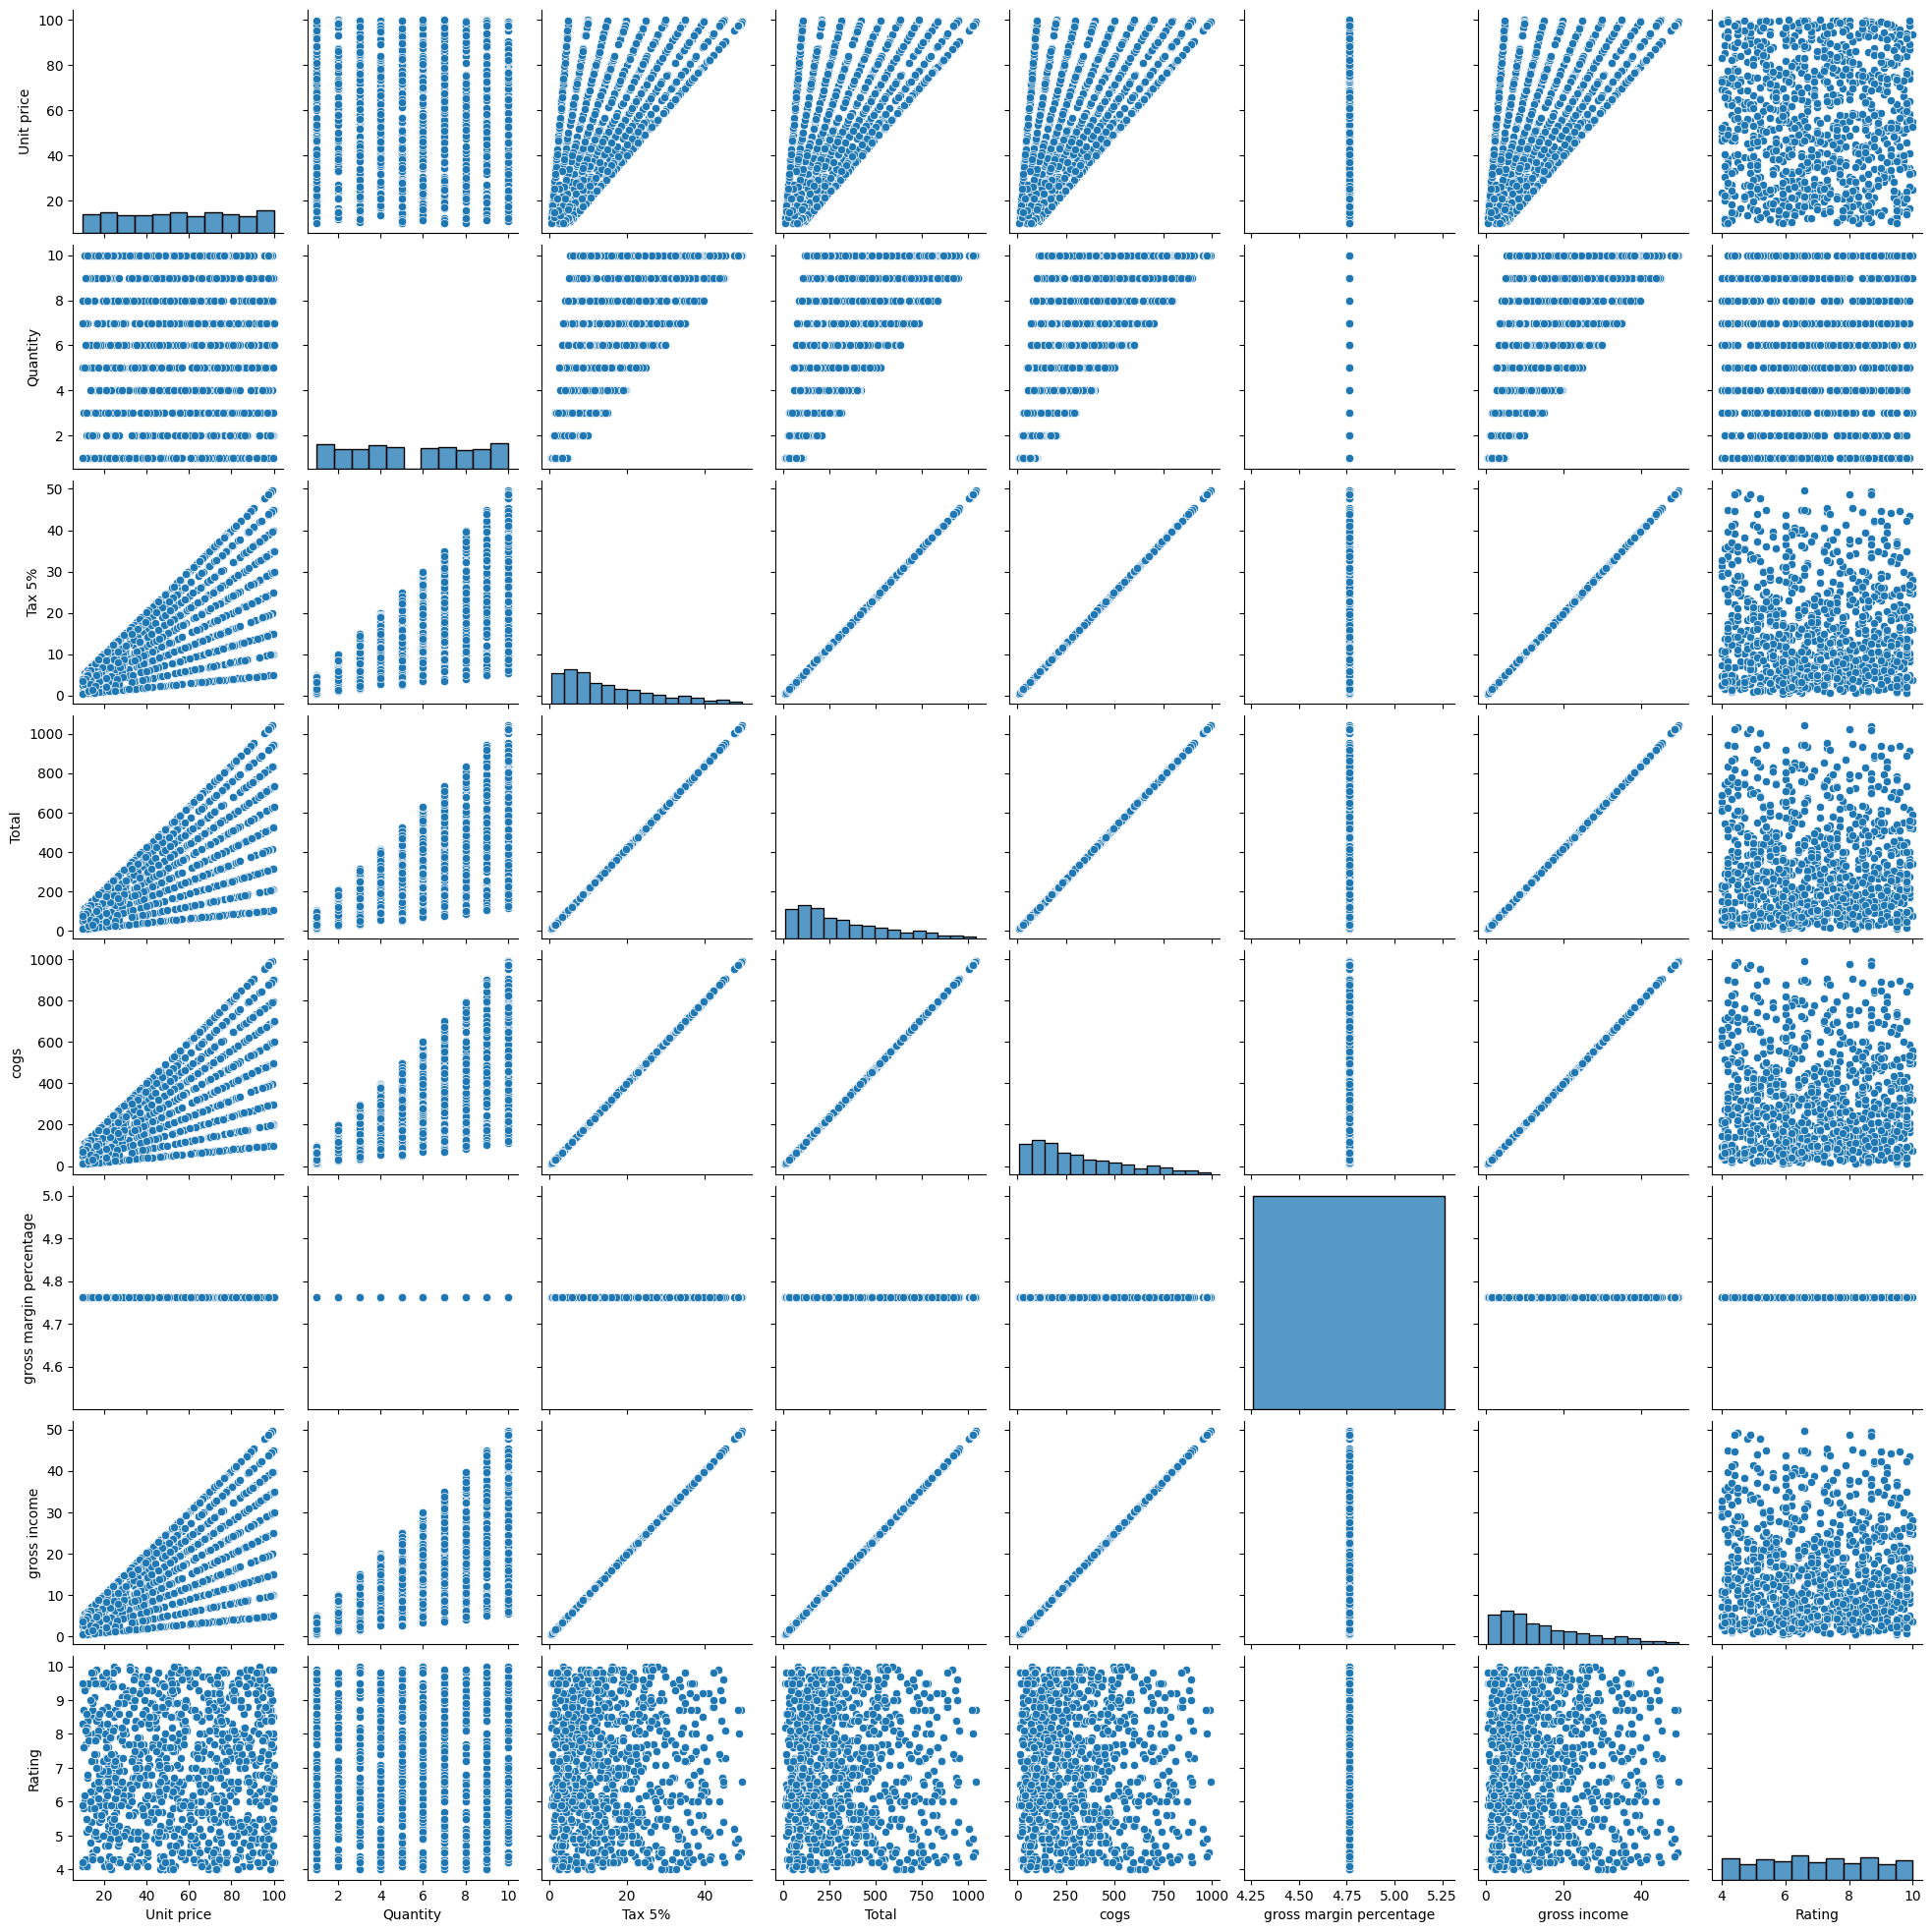

In [12]:
sns.pairplot(data=data)

In [13]:
 data['DateTime'] = data['Date']+" "+ data['Time']
data['DateTime'] = pd.to_datetime(data['DateTime'])

First I concat the two features that is date and time into DateTime and then convert that string to datetime

# Data Analysis and Data Cleaning

In [14]:
data['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

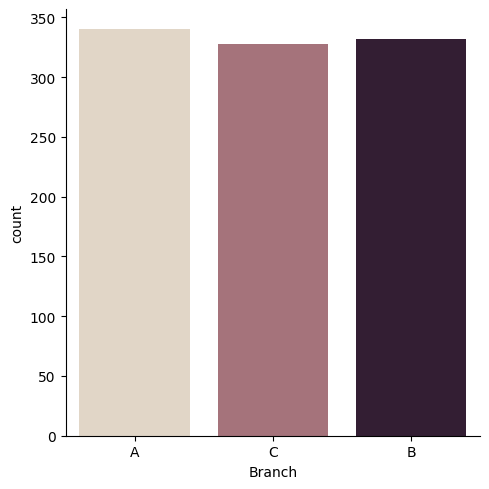

In [15]:
sns.catplot(x="Branch", kind="count", palette="ch:.25", data=data)

In [16]:
data['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

I will drop any of the feature (Branch or City) because both represent same I will drop for City bacuse it will easy for me to use Branch instead

In [17]:
data = data.drop(['City'],axis=1)
data = data.drop(['Date','Time'],axis=1)

In [18]:
data['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [19]:
data.head()

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,DateTime
0,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00
1,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00
2,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00
3,A,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00
4,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00


<AxesSubplot: xlabel='Total', ylabel='Rating'>

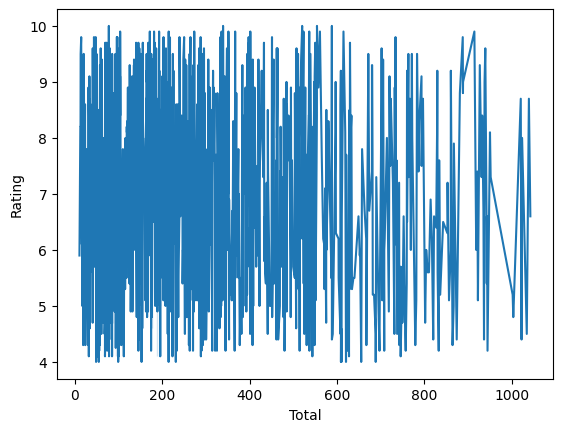

In [20]:
sns.lineplot(x="Total", y = "Rating", data =data)

<AxesSubplot: xlabel='Quantity', ylabel='Product line'>

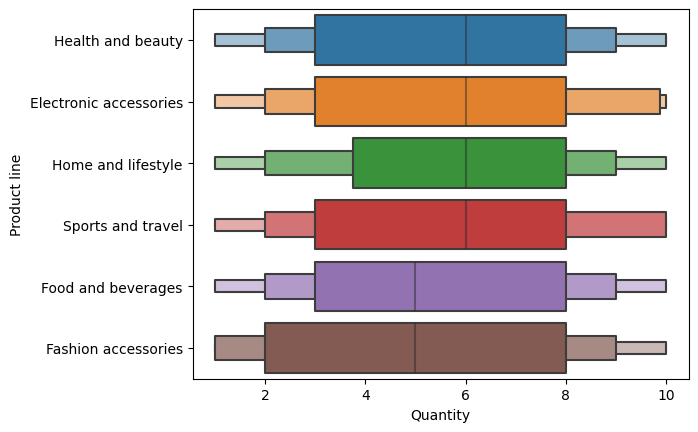

In [21]:
sns.boxenplot(y = 'Product line', x = 'Quantity', data=data )


<AxesSubplot: xlabel='count', ylabel='Product line'>

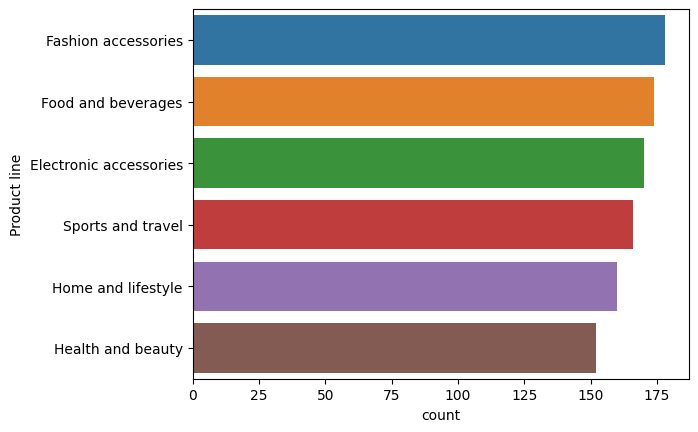

In [22]:
sns.countplot(y = 'Product line', data=data, order = data['Product line'].value_counts().index )

<AxesSubplot: xlabel='Total', ylabel='Product line'>

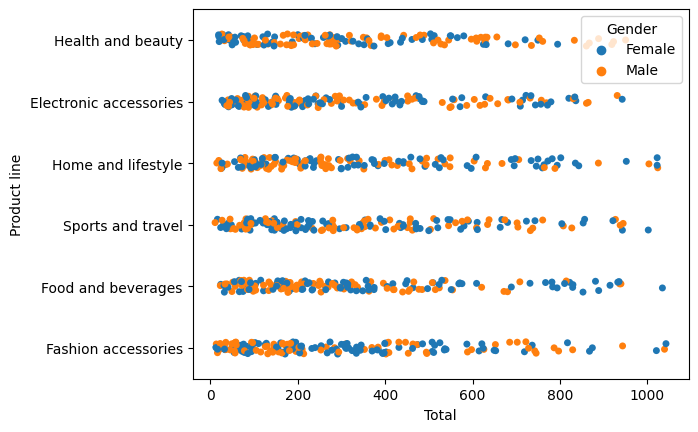

In [23]:
sns.stripplot(y = 'Product line', x = 'Total', hue = 'Gender', data=data )

Text(0.5, 1.0, 'Payment by Branch')

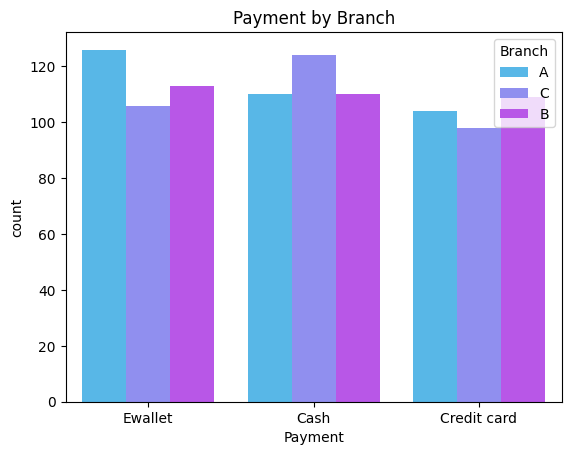

In [24]:
 sns.countplot(x="Payment", hue = "Branch", data =data,palette="cool").set_title("Payment by Branch") 

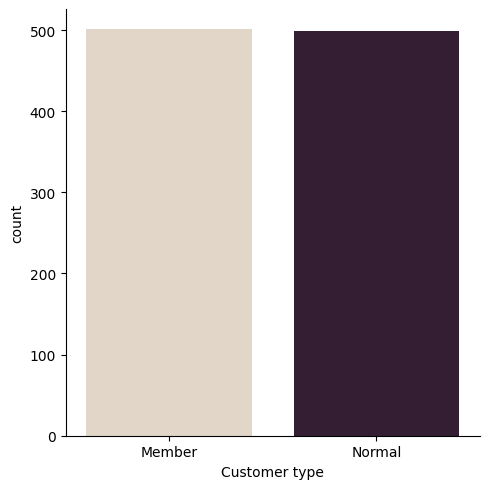

In [25]:
sns.catplot(x="Customer type", kind="count", palette="ch:.25", data=data)

Text(0.5, 1.0, 'Customer Type by Branch')

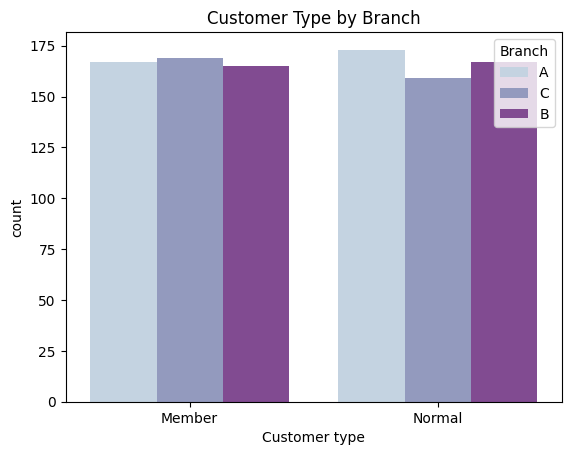

In [26]:
 sns.countplot(x="Customer type", hue = "Branch", data =data,palette="BuPu").set_title("Customer Type by Branch") 

In [27]:
data['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

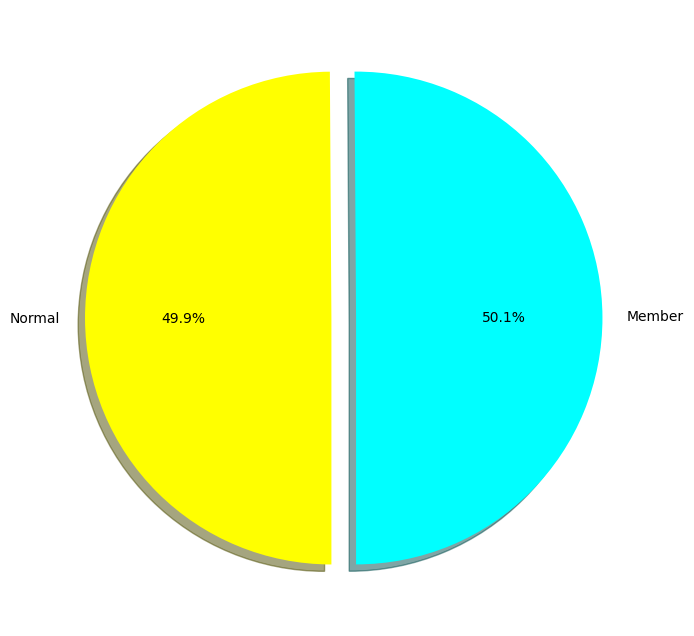

In [28]:
size = data['Customer type'].value_counts(sort=True)
colors = ['aqua','yellow']
labels = ['Member','Normal']
explode = (0,0.1)
plt.figure(figsize=(10 , 8))
plt.pie(size,colors=colors,autopct='%1.1f%%',shadow=True,startangle = 270 ,explode= explode, labels=labels)

plt.show()



Text(0.5, 1.0, 'Influence of Customer Type on Sales')

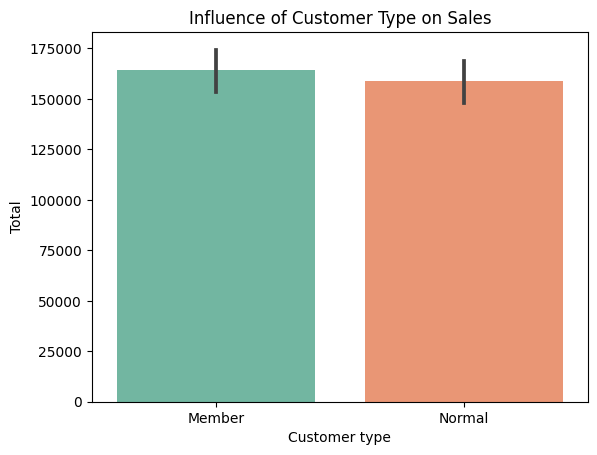

In [29]:
sns.barplot(x="Customer type", y="Total", estimator = sum, data=data,palette="Set2").set_title("Influence of Customer Type on Sales")

Text(0.5, 1.0, 'Customer Type vs Rating')

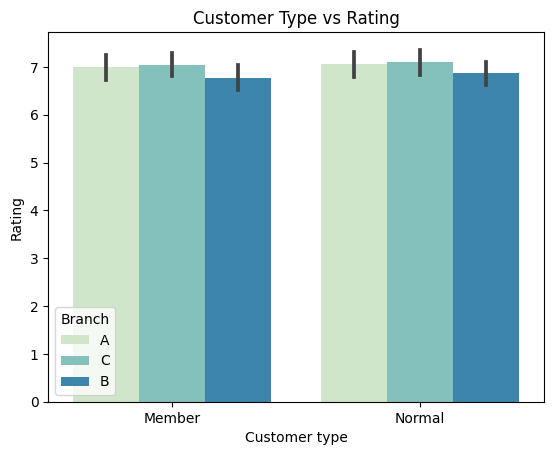

In [30]:
 sns.barplot(x="Customer type",  y = "Rating",  hue = "Branch", data =data,palette="GnBu").set_title("Customer Type vs Rating")

<AxesSubplot: xlabel='Customer type', ylabel='count'>

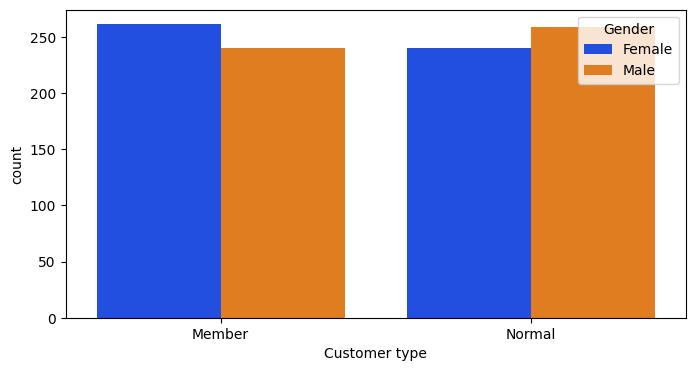

In [31]:
plt.figure(figsize=(8,4))
sns.countplot(x='Customer type', data= data, palette= "bright",hue = "Gender")

In [32]:
data['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

<AxesSubplot: xlabel='Product line', ylabel='count'>

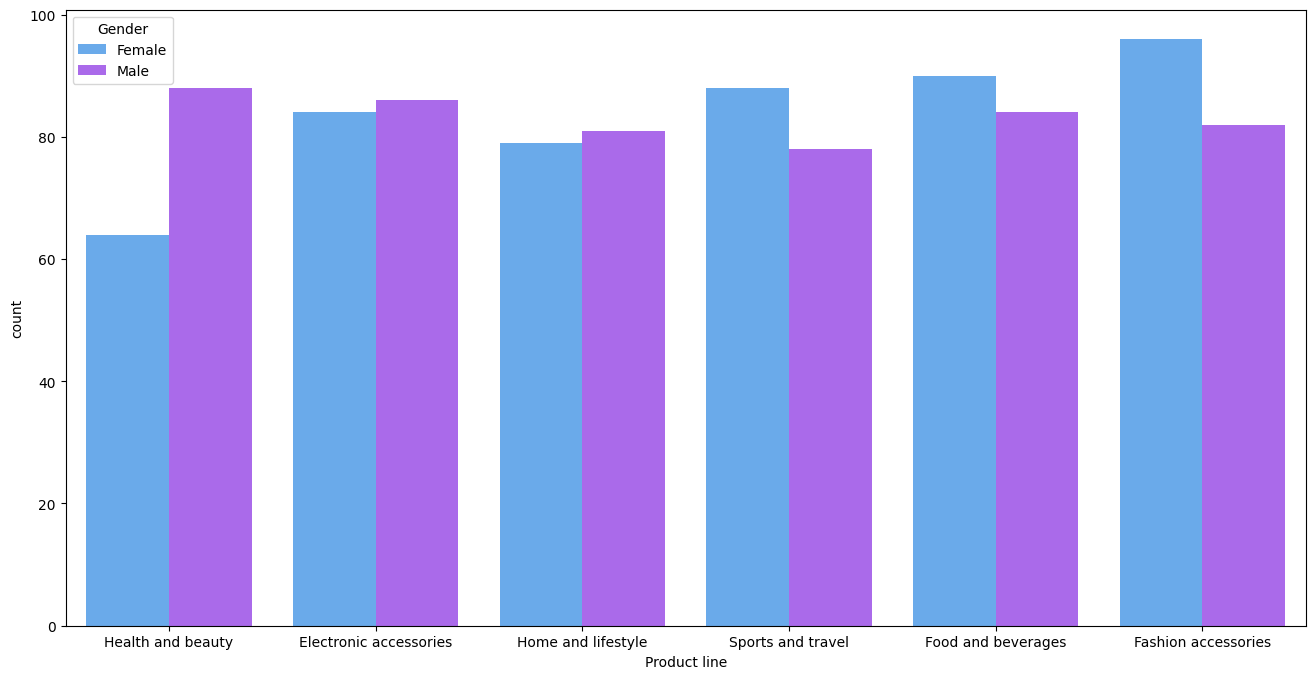

In [33]:
plt.figure(figsize=(16,8))
sns.countplot(x='Product line',data=data,palette='cool',hue='Gender')


It is surprising to know that men are buying beauty and health product, women buying sports and travel products more.

<AxesSubplot: xlabel='Payment', ylabel='count'>

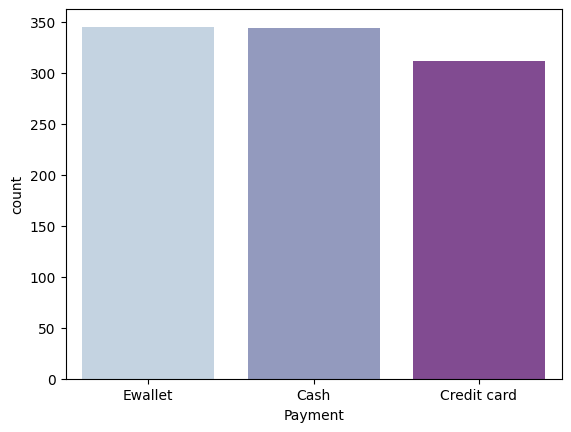

In [34]:
sns.countplot(x=data['Payment'],data=data,palette='BuPu')

<AxesSubplot: xlabel='Product line', ylabel='count'>

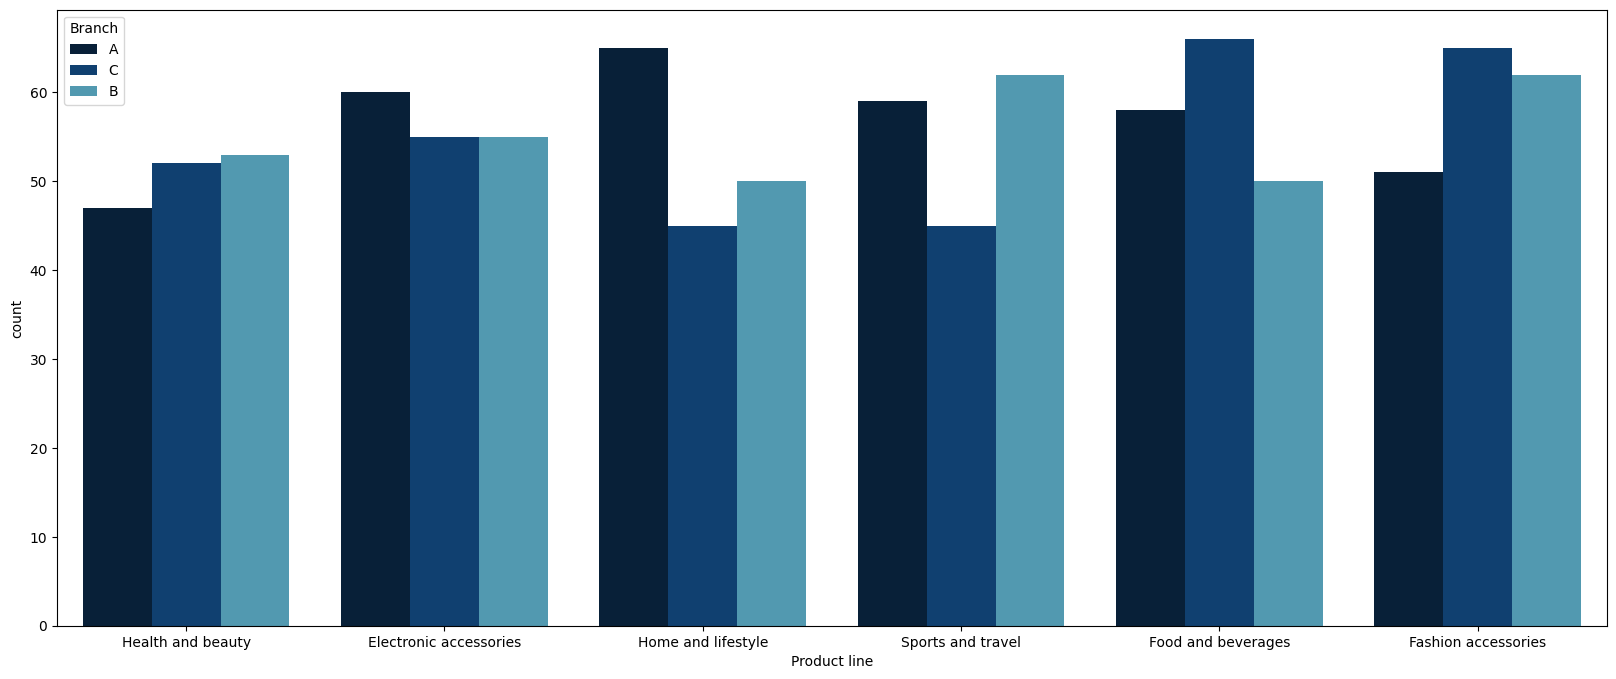

In [35]:
plt.figure(figsize=(20,8))
sns.countplot(x='Product line',data=data,palette='ocean',hue='Branch')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Branch                   1000 non-null   object        
 1   Customer type            1000 non-null   object        
 2   Gender                   1000 non-null   object        
 3   Product line             1000 non-null   object        
 4   Unit price               1000 non-null   float64       
 5   Quantity                 1000 non-null   int64         
 6   Tax 5%                   1000 non-null   float64       
 7   Total                    1000 non-null   float64       
 8   Payment                  1000 non-null   object        
 9   cogs                     1000 non-null   float64       
 10  gross margin percentage  1000 non-null   float64       
 11  gross income             1000 non-null   float64       
 12  Rating                   1000 non-n

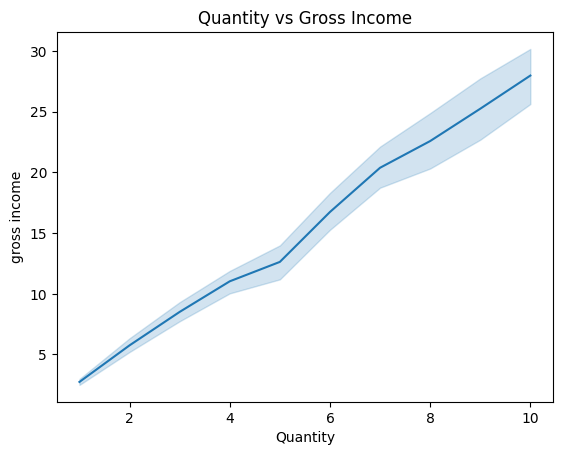

In [37]:
genderCount  = sns.lineplot(x="Quantity",  y = 'gross income',data =data).set_title("Quantity vs Gross Income")

<AxesSubplot: >

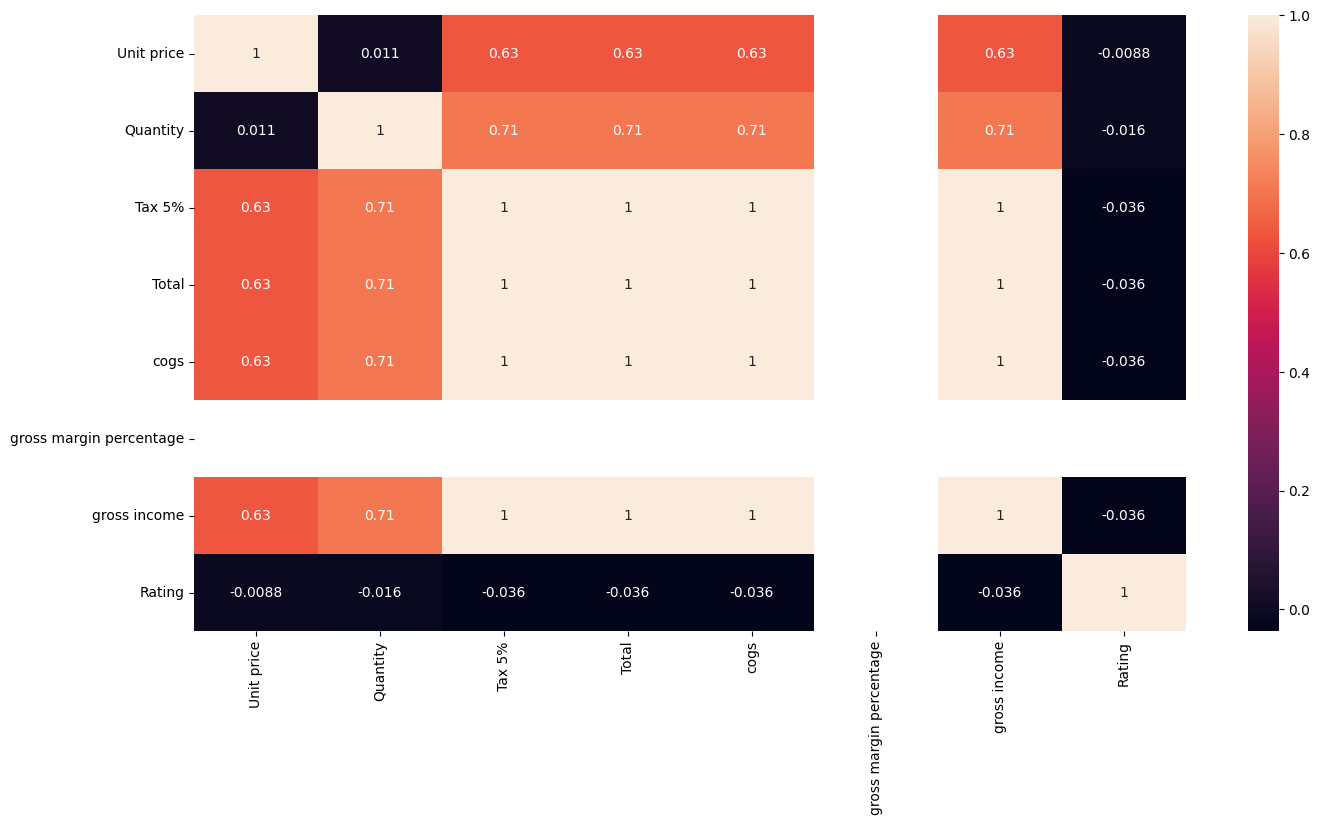

In [38]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),annot=True)

In [39]:
# categorical data
[i for i in data.columns if data[i].dtype == 'object']
data = pd.get_dummies(data,drop_first=True)

In [40]:
#Feature Engineering 

data['TotalbyQuantity'] = data['Total'] / data['Quantity']


In [41]:
# Standardizing the numerical variables
num = data[['Unit price','Quantity','Tax 5%','Total','cogs','gross margin percentage','gross income','Rating','TotalbyQuantity']]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num = scaler.fit_transform(num)
num = pd.DataFrame(num,columns=['Unit price','Quantity','Tax 5%','Total','cogs','gross margin percentage','gross income','Rating','TotalbyQuantity'])
num

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,TotalbyQuantity
0,0.718847,0.666667,0.521616,0.521616,0.521616,0.0,0.521616,0.850000,0.718847
1,0.057855,0.444444,0.067387,0.067387,0.067387,0.0,0.067387,0.933333,0.057855
2,0.403316,0.666667,0.319628,0.319628,0.319628,0.0,0.319628,0.566667,0.403316
3,0.535603,0.777778,0.463549,0.463549,0.463549,0.0,0.463549,0.733333,0.535603
4,0.848131,0.666667,0.604377,0.604377,0.604377,0.0,0.604377,0.216667,0.848131
...,...,...,...,...,...,...,...,...,...
995,0.336782,0.000000,0.030707,0.030707,0.030707,0.0,0.030707,0.366667,0.336782
996,0.971295,1.000000,0.980465,0.980465,0.980465,0.0,0.980465,0.066667,0.971295
997,0.242101,0.000000,0.022049,0.022049,0.022049,0.0,0.022049,0.616667,0.242101
998,0.620160,0.000000,0.056622,0.056622,0.056622,0.0,0.056622,0.016667,0.620160


In [42]:
data=data.drop(['Unit price','Quantity','Tax 5%','Total','cogs','gross margin percentage','gross income','Rating','TotalbyQuantity'],axis=1)
data = pd.concat([data,num],axis=1)
data.head()

,DateTime,Branch_B,Branch_C,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,...,Payment_Ewallet,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,TotalbyQuantity
0,2019-01-05 13:08:00,0,0,0,0,0,0,1,0,0,...,1,0.718847,0.666667,0.521616,0.521616,0.521616,0.0,0.521616,0.850000,0.718847
1,2019-03-08 10:29:00,0,1,1,0,0,0,0,0,0,...,0,0.057855,0.444444,0.067387,0.067387,0.067387,0.0,0.067387,0.933333,0.057855
2,2019-03-03 13:23:00,0,0,1,1,0,0,0,1,0,...,0,0.403316,0.666667,0.319628,0.319628,0.319628,0.0,0.319628,0.566667,0.403316
3,2019-01-27 20:33:00,0,0,0,1,0,0,1,0,0,...,1,0.535603,0.777778,0.463549,0.463549,0.463549,0.0,0.463549,0.733333,0.535603
4,2019-02-08 10:37:00,0,0,1,1,0,0,0,0,1,...,1,0.848131,0.666667,0.604377,0.604377,0.604377,0.0,0.604377,0.216667,0.848131


In [43]:
data = data.drop(['DateTime'],axis=1)
#Splitting Datas
X = data.drop(['Total'],axis=1)
y = data['Total']

# EDA WITH PANDAS PROFILING

In [45]:
'''profile = ProfileReport(pd.read_csv('supermarket_sales - Sheet1.csv'), explorative=True)'''

"profile = ProfileReport(pd.read_csv('supermarket_sales - Sheet1.csv'), explorative=True)"

In [47]:
import dataframe_image as dfi
dh=data.head(25)
df_styled = dh.style.background_gradient()
dfi.export(df_styled,"head.png")


In [46]:
'''profile.to_file("PANDAS-PROFILE.html")'''

'profile.to_file("PANDAS-PROFILE.html")'

# EDA USING SWEETVIZ

In [47]:
'''sweet_report = sv.analyze(pd.read_csv("supermarket_sales - Sheet1.csv"))'''


'sweet_report = sv.analyze(pd.read_csv("supermarket_sales - Sheet1.csv"))'

In [48]:
'''sweet_report.show_html('sweet_report.html')'''

"sweet_report.show_html('sweet_report.html')"

# EDA USING DTALE

In [49]:
'''dtale.show(pd.read_csv("supermarket_sales - Sheet1.csv"))'''


'dtale.show(pd.read_csv("supermarket_sales - Sheet1.csv"))'

# Splitting the data into Train and Test

In [50]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=0)

In [51]:
xtrain.shape

(700, 19)

# Modelling

In [52]:
#Supporting functions
from sklearn.preprocessing import PolynomialFeatures
#Fit Models
from sklearn.linear_model import LinearRegression,Ridge,LassoCV
from sklearn.model_selection import validation_curve

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_log_error

# Linear Regression
Linear Regression is a simple supervised machine model which uses linear function on input features to obtain the output

In [53]:
LR=LinearRegression()
LR.fit(xtrain,ytrain)
ypred=LR.predict(xtest)
LinAcc=r2_score(ytest,ypred)*100
print("Training Data R2 Score  : ",r2_score(ytest,ypred)*100,"%")
print("Testing Data R2 Score  : ",r2_score(ytest,ypred)*100,"%")
print("Mean Absolute Error  : ",mean_absolute_error(ytest,ypred))
print("Mean Squared Error  : ",mean_squared_error(ytest,ypred))
print("Root Mean Squared Error  : ",mean_squared_error(ytest,ypred,squared=False))
print("Mean Absolute Percentage Error  : ",mean_absolute_percentage_error(ytest,ypred))
print("Mean Squared Log Error  : ",mean_squared_log_error(ytest,ypred))


Training Data R2 Score  :  100.0 %
Testing Data R2 Score  :  100.0 %
Mean Absolute Error  :  3.0421845598205267e-16
Mean Squared Error  :  1.362968233499715e-31
Root Mean Squared Error  :  3.6918399660598984e-16
Mean Absolute Percentage Error  :  2.975496584089426e-15
Mean Squared Log Error  :  8.870739535071671e-32


# Ridge Regression
Ridge Regression(Tikhonov regularization) is a regularized version of Linear Regression,The regularization term forces the learning algorithm to not only fit the data but also keep the model weights as small as possible

In [54]:
RidgeReg = Ridge(alpha=1.0)
RidgeReg.fit(xtrain,ytrain)
ypred=RidgeReg.predict(xtest)
RidAcc=r2_score(ytest,ypred)*100
print("Training Data R2 Score  : ",r2_score(ytest,ypred)*100,"%")
print("Testing Data R2 Score  : ",r2_score(ytest,ypred)*100,"%")
print("Mean Absolute Error  : ",mean_absolute_error(ytest,ypred))
print("Mean Squared Error  : ",mean_squared_error(ytest,ypred))
print("Root Mean Squared Error  : ",mean_squared_error(ytest,ypred,squared=False))
print("Mean Absolute Percentage Error  : ",mean_absolute_percentage_error(ytest,ypred))



Training Data R2 Score  :  99.95562803310513 %
Testing Data R2 Score  :  99.95562803310513 %
Mean Absolute Error  :  0.003879430632348018
Mean Squared Error  :  2.5970506425636896e-05
Root Mean Squared Error  :  0.005096126610047763
Mean Absolute Percentage Error  :  0.06334520238666026


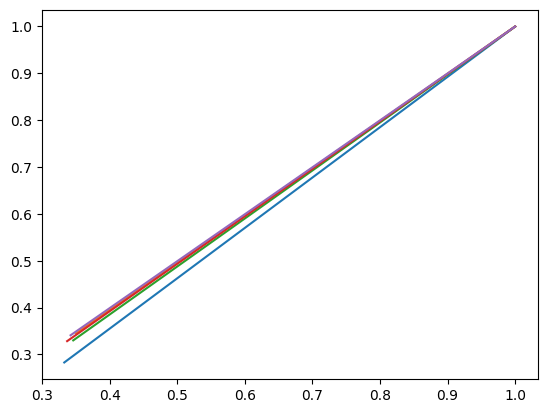

In [55]:
train_scores, valid_scores = validation_curve(Ridge(), X, y, param_name="alpha", param_range=np.logspace(-7, 3, 3),cv=5)
plt.plot(train_scores,valid_scores)

# LassoCV Regression
Lasso Regression is similar to ridge regression except that it uses L1 regularization,It automatically performs feature selection

In [56]:
LassoCVReg = LassoCV()
LassoCVReg.fit(xtrain,ytrain)
ypred = LassoCVReg.predict(xtest)
LassoAcc=r2_score(ytest,ypred)*100
print("Training Data R2 Score  : ",r2_score(ytest,ypred)*100,"%")
print("Testing Data R2 Score  : ",r2_score(ytest,ypred)*100,"%")
print("Mean Absolute Error  : ",mean_absolute_error(ytest,ypred))
print("Mean Squared Error  : ",mean_squared_error(ytest,ypred))
print("Root Mean Squared Error  : ",mean_squared_error(ytest,ypred,squared=False))
print("Mean Absolute Percentage Error  : ",mean_absolute_percentage_error(ytest,ypred))
print("Mean Squared Log Error  : ",mean_squared_log_error(ytest,ypred))


Training Data R2 Score  :  99.99989997678436 %
Testing Data R2 Score  :  99.99989997678436 %
Mean Absolute Error  :  0.00020023384095388798
Mean Squared Error  :  5.8542673366923425e-08
Root Mean Squared Error  :  0.00024195593269627308
Mean Absolute Percentage Error  :  0.002368917612399135
Mean Squared Log Error  :  3.024656627310134e-08


# Decision Tree Regression


In [57]:
from sklearn.tree import DecisionTreeRegressor
r = DecisionTreeRegressor(random_state = 0)
r.fit(xtrain, ytrain)
ypred = r.predict(xtest)
DTAcc=r2_score(ytest,ypred)*100
print("Training Data R2 Score  : ",r2_score(ytest,ypred)*100,"%")
print("Testing Data R2 Score  : ",r2_score(ytest,ypred)*100,"%")
print("Mean Absolute Error  : ",mean_absolute_error(ytest,ypred))
print("Mean Squared Error  : ",mean_squared_error(ytest,ypred))
print("Root Mean Squared Error  : ",mean_squared_error(ytest,ypred,squared=False))
print("Mean Absolute Percentage Error  : ",mean_absolute_percentage_error(ytest,ypred))
print("Mean Squared Log Error  : ",mean_squared_log_error(ytest,ypred))

Training Data R2 Score  :  99.99190198616994 %
Testing Data R2 Score  :  99.99190198616994 %
Mean Absolute Error  :  0.0012818425702647766
Mean Squared Error  :  4.73969343543133e-06
Root Mean Squared Error  :  0.0021770836996843576
Mean Absolute Percentage Error  :  0.006339860268358655
Mean Squared Log Error  :  1.9399026516594827e-06


# Random Forest Regression

In [58]:
from sklearn.ensemble import RandomForestRegressor
r = RandomForestRegressor(n_estimators = 160, random_state = 0)
r.fit(xtrain, ytrain)
ypred = r.predict(xtest)
RFAcc=r2_score(ytest,ypred)*100
print("Training Data R2 Score  : ",r2_score(ytest,ypred)*100,"%")
print("Testing Data R2 Score  : ",r2_score(ytest,ypred)*100,"%")
print("Mean Absolute Error  : ",mean_absolute_error(ytest,ypred))
print("Mean Squared Error  : ",mean_squared_error(ytest,ypred))
print("Root Mean Squared Error  : ",mean_squared_error(ytest,ypred,squared=False))
print("Mean Absolute Percentage Error  : ",mean_absolute_percentage_error(ytest,ypred))
print("Mean Squared Log Error  : ",mean_squared_log_error(ytest,ypred))

Training Data R2 Score  :  99.99623026990709 %
Testing Data R2 Score  :  99.99623026990709 %
Mean Absolute Error  :  0.0008324614887620366
Mean Squared Error  :  2.206388547810902e-06
Root Mean Squared Error  :  0.0014853917152761094
Mean Absolute Percentage Error  :  0.0043602647346682455
Mean Squared Log Error  :  8.213474791512735e-07


# K-Nearest Neighbors Regression

In [59]:
from sklearn.neighbors import KNeighborsRegressor
r = KNeighborsRegressor(n_neighbors = 5)
r.fit(xtrain, ytrain)
ypred = r.predict(xtest)
KnnAcc=r2_score(ytest,ypred)*100
print("Training Data R2 Score  : ",r2_score(ytest,ypred)*100,"%")
print("Testing Data R2 Score  : ",r2_score(ytest,ypred)*100,"%")
print("Mean Absolute Error  : ",mean_absolute_error(ytest,ypred))
print("Mean Squared Error  : ",mean_squared_error(ytest,ypred))
print("Root Mean Squared Error  : ",mean_squared_error(ytest,ypred,squared=False))
print("Mean Absolute Percentage Error  : ",mean_absolute_percentage_error(ytest,ypred))
print("Mean Squared Log Error  : ",mean_squared_log_error(ytest,ypred))

Training Data R2 Score  :  79.19013407679317 %
Testing Data R2 Score  :  79.19013407679317 %
Mean Absolute Error  :  0.08680629067760107
Mean Squared Error  :  0.012179824210987473
Root Mean Squared Error  :  0.11036224087516289
Mean Absolute Percentage Error  :  0.8980853999347956
Mean Squared Log Error  :  0.0063576740636775144


# Support Vector Regression

In [60]:
from sklearn.svm import SVR
r = SVR(kernel = 'rbf')
r.fit(xtrain, ytrain)
ypred = r.predict(xtest)
SVRAcc=r2_score(ytest,ypred)*100
print("Training Data R2 Score  : ",r2_score(ytest,ypred)*100,"%")
print("Testing Data R2 Score  : ",r2_score(ytest,ypred)*100,"%")
print("Mean Absolute Error  : ",mean_absolute_error(ytest,ypred))
print("Mean Squared Error  : ",mean_squared_error(ytest,ypred))
print("Root Mean Squared Error  : ",mean_squared_error(ytest,ypred,squared=False))
print("Mean Absolute Percentage Error  : ",mean_absolute_percentage_error(ytest,ypred))
print("Mean Squared Log Error  : ",mean_squared_log_error(ytest,ypred))

Training Data R2 Score  :  92.99565601217977 %
Testing Data R2 Score  :  92.99565601217977 %
Mean Absolute Error  :  0.04856494043845276
Mean Squared Error  :  0.004099578478773344
Root Mean Squared Error  :  0.06402795076193947
Mean Absolute Percentage Error  :  0.7915153499052666
Mean Squared Log Error  :  0.0025528270467396327


In [61]:
import keras #library for neural network
from sklearn.preprocessing import normalize #machine learning algorithm library
#Neural network module
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
#from keras.layers.normalization import BatchNormalization 
from keras.utils import np_utils

model=Sequential()

model.add(Dense(3,activation='relu'))
model.compile(loss='mean_absolute_error',optimizer='adam')


import tensorflow as tf
model.add(tf.keras.layers.Dense(1, input_shape=(xtrain.shape[1],), activation='relu'))

model.fit(xtrain,ytrain,validation_data=(xtest,ytest),batch_size=10,epochs=50,verbose=1)

Epoch 1/50
70/70 [==============================] - 1s 9ms/step - loss: 0.2451 - val_loss: 0.2262
Epoch 2/50
70/70 [==============================] - 0s 5ms/step - loss: 0.2076 - val_loss: 0.1980
Epoch 3/50
70/70 [==============================] - 0s 4ms/step - loss: 0.1854 - val_loss: 0.1783
Epoch 4/50
70/70 [==============================] - 0s 5ms/step - loss: 0.1692 - val_loss: 0.1634
Epoch 5/50
70/70 [==============================] - 0s 5ms/step - loss: 0.1559 - val_loss: 0.1501
Epoch 6/50
70/70 [==============================] - 0s 4ms/step - loss: 0.1431 - val_loss: 0.1392
Epoch 7/50
70/70 [==============================] - 0s 5ms/step - loss: 0.1292 - val_loss: 0.1251
Epoch 8/50
70/70 [==============================] - 0s 5ms/step - loss: 0.1161 - val_loss: 0.1123
Epoch 9/50
70/70 [==============================] - 0s 5ms/step - loss: 0.1023 - val_loss: 0.0987
Epoch 10/50
70/70 [==============================] - 0s 5ms/step - loss: 0.0889 - val_loss: 0.0847
Epoch 11/50
70/70 [

In [62]:
ypred=model.predict(xtest)
LstmAcc=r2_score(ytest,ypred)*100
print("Training Data R2 Score  : ",r2_score(ytest,ypred)*100,"%")
print("Testing Data R2 Score  : ",r2_score(ytest,ypred)*100,"%")
print("Mean Absolute Error  : ",mean_absolute_error(ytest,ypred))
print("Mean Squared Error  : ",mean_squared_error(ytest,ypred))
print("Root Mean Squared Error  : ",mean_squared_error(ytest,ypred,squared=False))
print("Mean Absolute Percentage Error  : ",mean_absolute_percentage_error(ytest,ypred))
print("Mean Squared Log Error  : ",mean_squared_log_error(ytest,ypred))

10/10 [==============================] - 0s 2ms/step
Training Data R2 Score  :  99.96814854494357 %
Testing Data R2 Score  :  99.96814854494357 %
Mean Absolute Error  :  0.001103043123697315
Mean Squared Error  :  1.8642365351268718e-05
Root Mean Squared Error  :  0.004317680552248941
Mean Absolute Percentage Error  :  0.037774521329364555
Mean Squared Log Error  :  1.6974091286483893e-05


In [63]:
model_acc= pd.DataFrame({'Model' : ['Linear Regression','Ridge Regression','LassoCV Regression','Decision Tree','Random Forest','K Nearest Neighbor','SVR','LSTM'],'Accuracy' : [LinAcc,RidAcc,LassoAcc,DTAcc,RFAcc,KnnAcc,SVRAcc,LstmAcc]})
model_acc = model_acc.sort_values(by=['Accuracy'],ascending=False)


In [64]:
model_acc

,Model,Accuracy
0,Linear Regression,100.000000
2,LassoCV Regression,99.999900
4,Random Forest,99.996230
3,Decision Tree,99.991902
7,LSTM,99.968149
1,Ridge Regression,99.955628
6,SVR,92.995656
5,K Nearest Neighbor,79.190134


# OLS


In [67]:
import statsmodels.api as sm
one=np.ones((1000,1),dtype=int)
X=np.append(arr=one,values=X,axis=1)
X_new = np.array(X[:, 0:20], dtype=float)
obj = sm.OLS(endog = y, exog = X_new).fit()
print(obj.summary())


                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.368e+06
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        08:27:39   Log-Likelihood:                 4953.8
No. Observations:                1000   AIC:                            -9878.
Df Residuals:                     985   BIC:                            -9804.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2246   1.49e+10   1.51e-11      1.0

In [ ]:
import sys
sys.stdout=open("OLS.txt","w")
print(obj.summary())
sys.stdout.close()
